In [ ]:
l = 1
def evolve(Z_n):
    p = 2*np.random.binomial(1,0.5)-1
    return Z_n + p

Z_n = 0
N = 10000
M = 100
S_n = np.zeros((N, M))
for i in range(N):
    Z_n = 0
    for j in range(M):
        S_n[i, j] = Z_n ** 2
        Z_n= evolve(Z_n)

plt.figure()
#for i in range(10):
#    plt.plot(range(M), R_squared[i, :], lw=.5, alpha=.5)
L = np.arange(M)
plt.plot(L, L* l**2,label='expected',alpha=.8)
plt.scatter(range(M), S_n.mean(axis=0),label='1d simulated',s=4,color='C1')
plt.legend()
plt.gcf()

In [ ]:
l = 1
def evolve(r_n):
    theta = 2*np.pi * np.random.random_sample()
    return np.sqrt(r_n**2 + l **2 - 2 * l * r_n * np.cos(theta))

r_n = 0
N = 10000
M = 100
R_2 = np.zeros((N, M))
for i in range(N):
    r_n = 0
    for j in range(M):
        R_2[i, j] = r_n ** 2
        r_n = evolve(r_n)

plt.figure()
#for i in range(10):
#    plt.plot(range(M), R_squared[i, :], lw=.5, alpha=.5)
L = np.arange(M)
plt.plot(L, L* l**2,label='expected',alpha=.8)
plt.scatter(range(M), R_2.mean(axis=0),label='2d simulated',s=4,color='C1')
plt.legend()
plt.gcf()

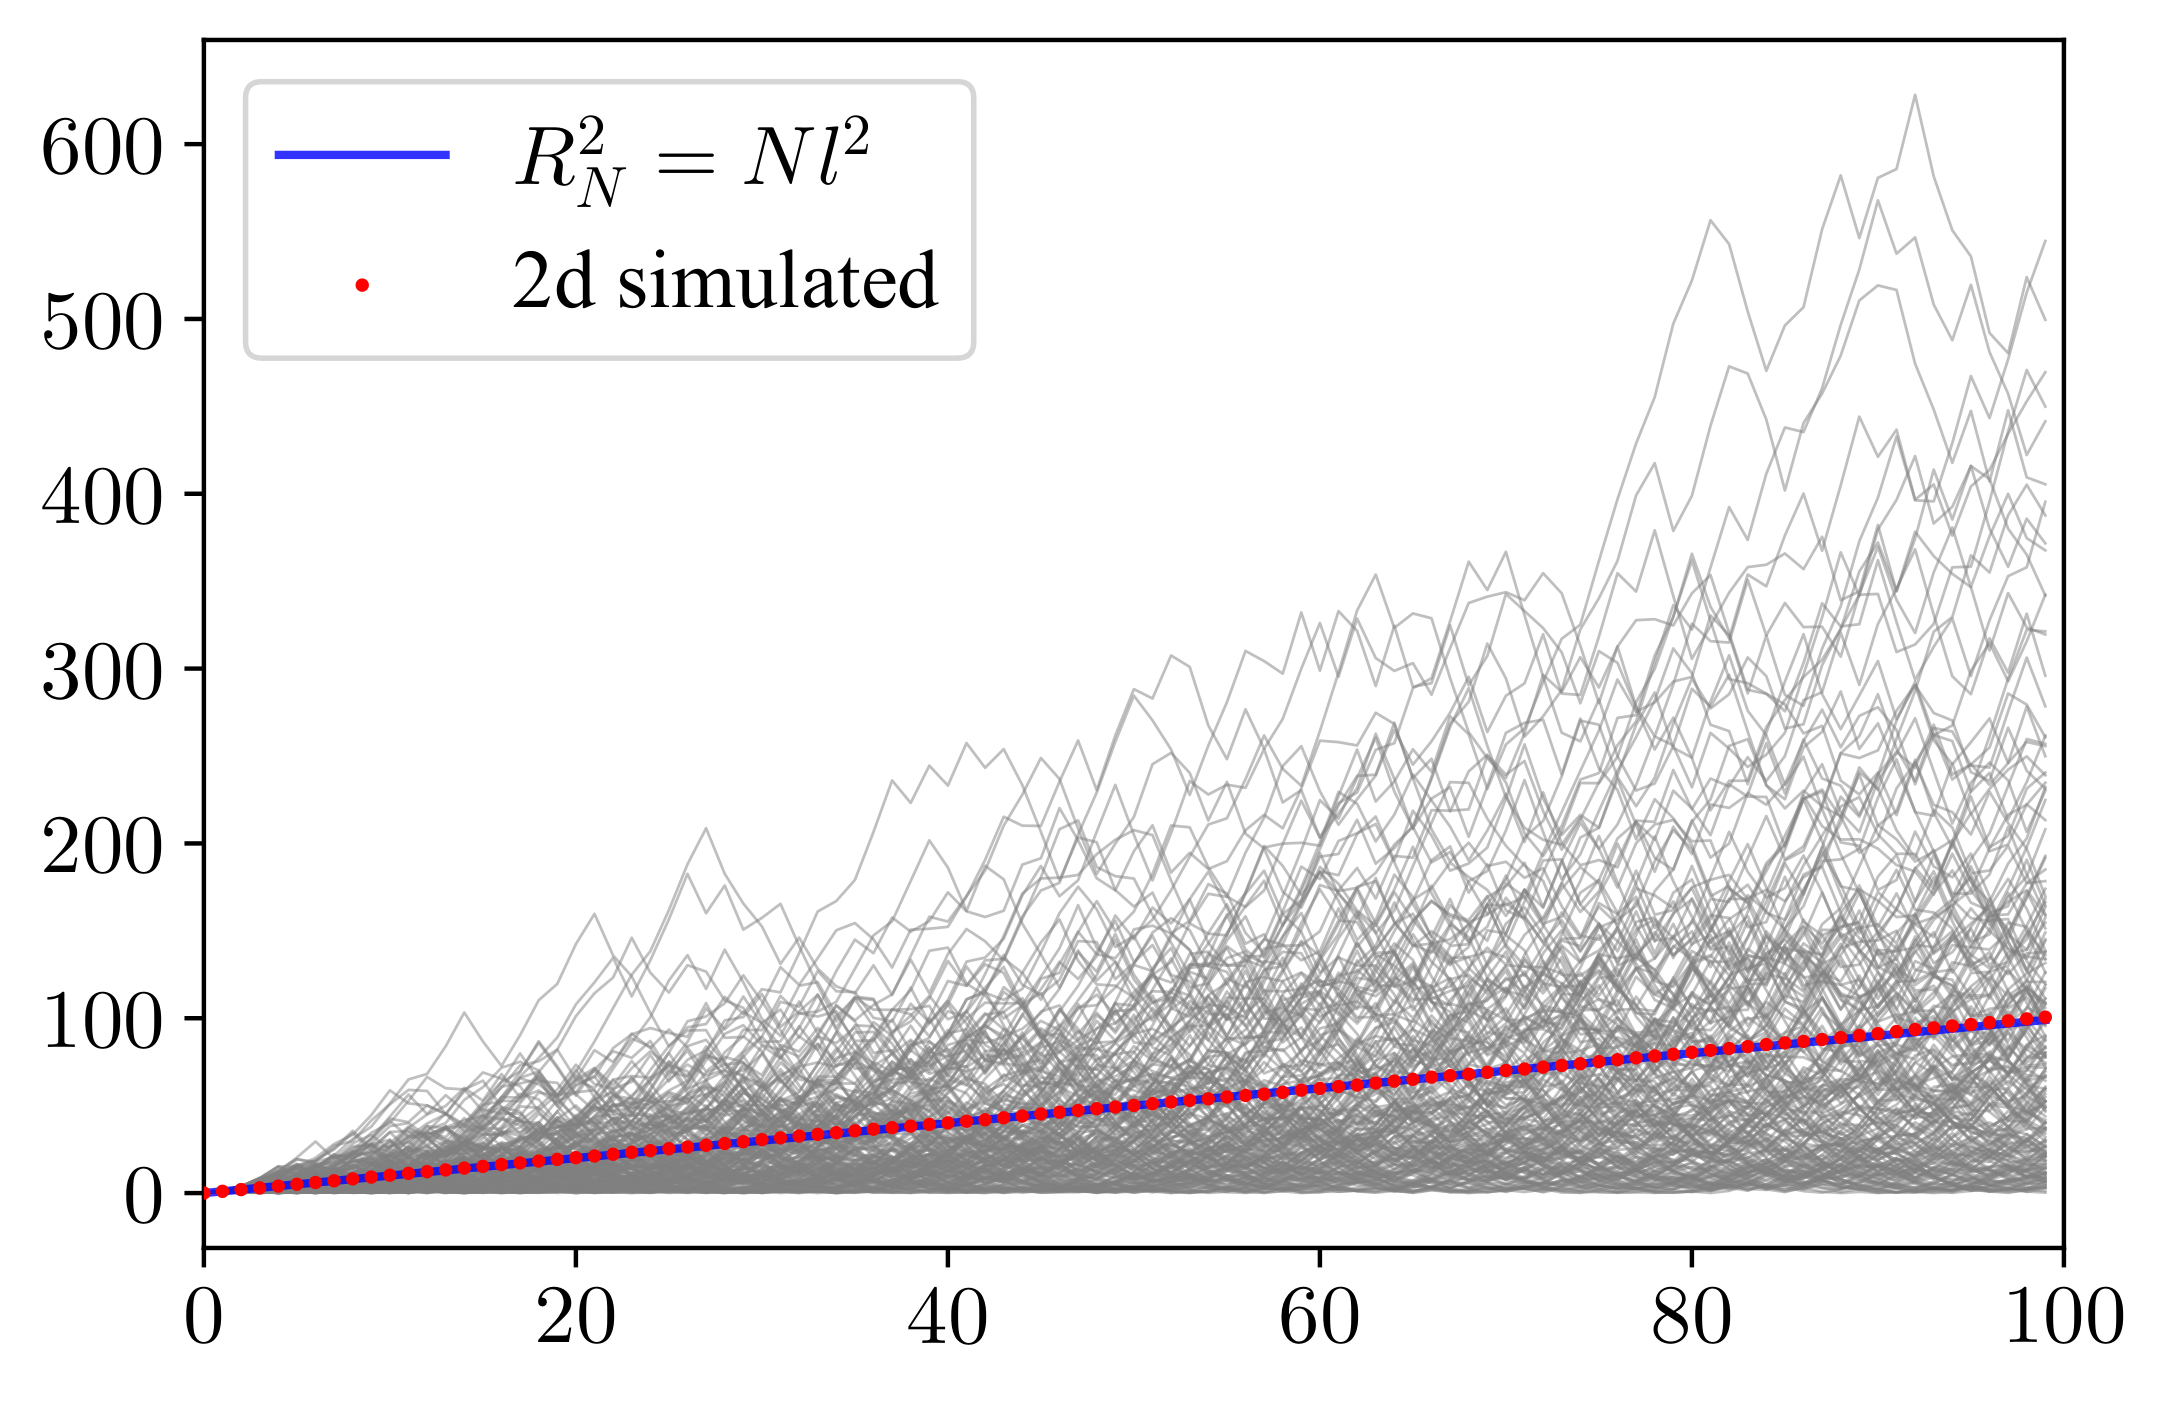

In [2]:
l = 1
def evolve(r_n):
    theta = 2*np.pi * np.random.uniform()
    return np.sqrt(r_n**2 + l **2 - 2 * l * r_n * np.cos(theta))

r_n = 0
N = 10000
M = 100
R_2 = np.zeros((N, M))
for i in range(N):
    r_n = 0
    for j in range(M):
        R_2[i, j] = r_n ** 2
        r_n = evolve(r_n)

plt.figure()
for i in range(200):
    plt.plot(range(M), R_2[i, :], lw=.5, alpha=.5, color='grey')
L = np.arange(M)

plt.scatter(range(M), R_2.mean(axis=0), label='2d simulated',s=2,color='red',zorder=10)
plt.plot(L, L* l**2, color='blue', label='$R_N^2=N l^2$',alpha=.8,zorder=5)
plt.xlim(0, M)
plt.legend()
plt.gcf()

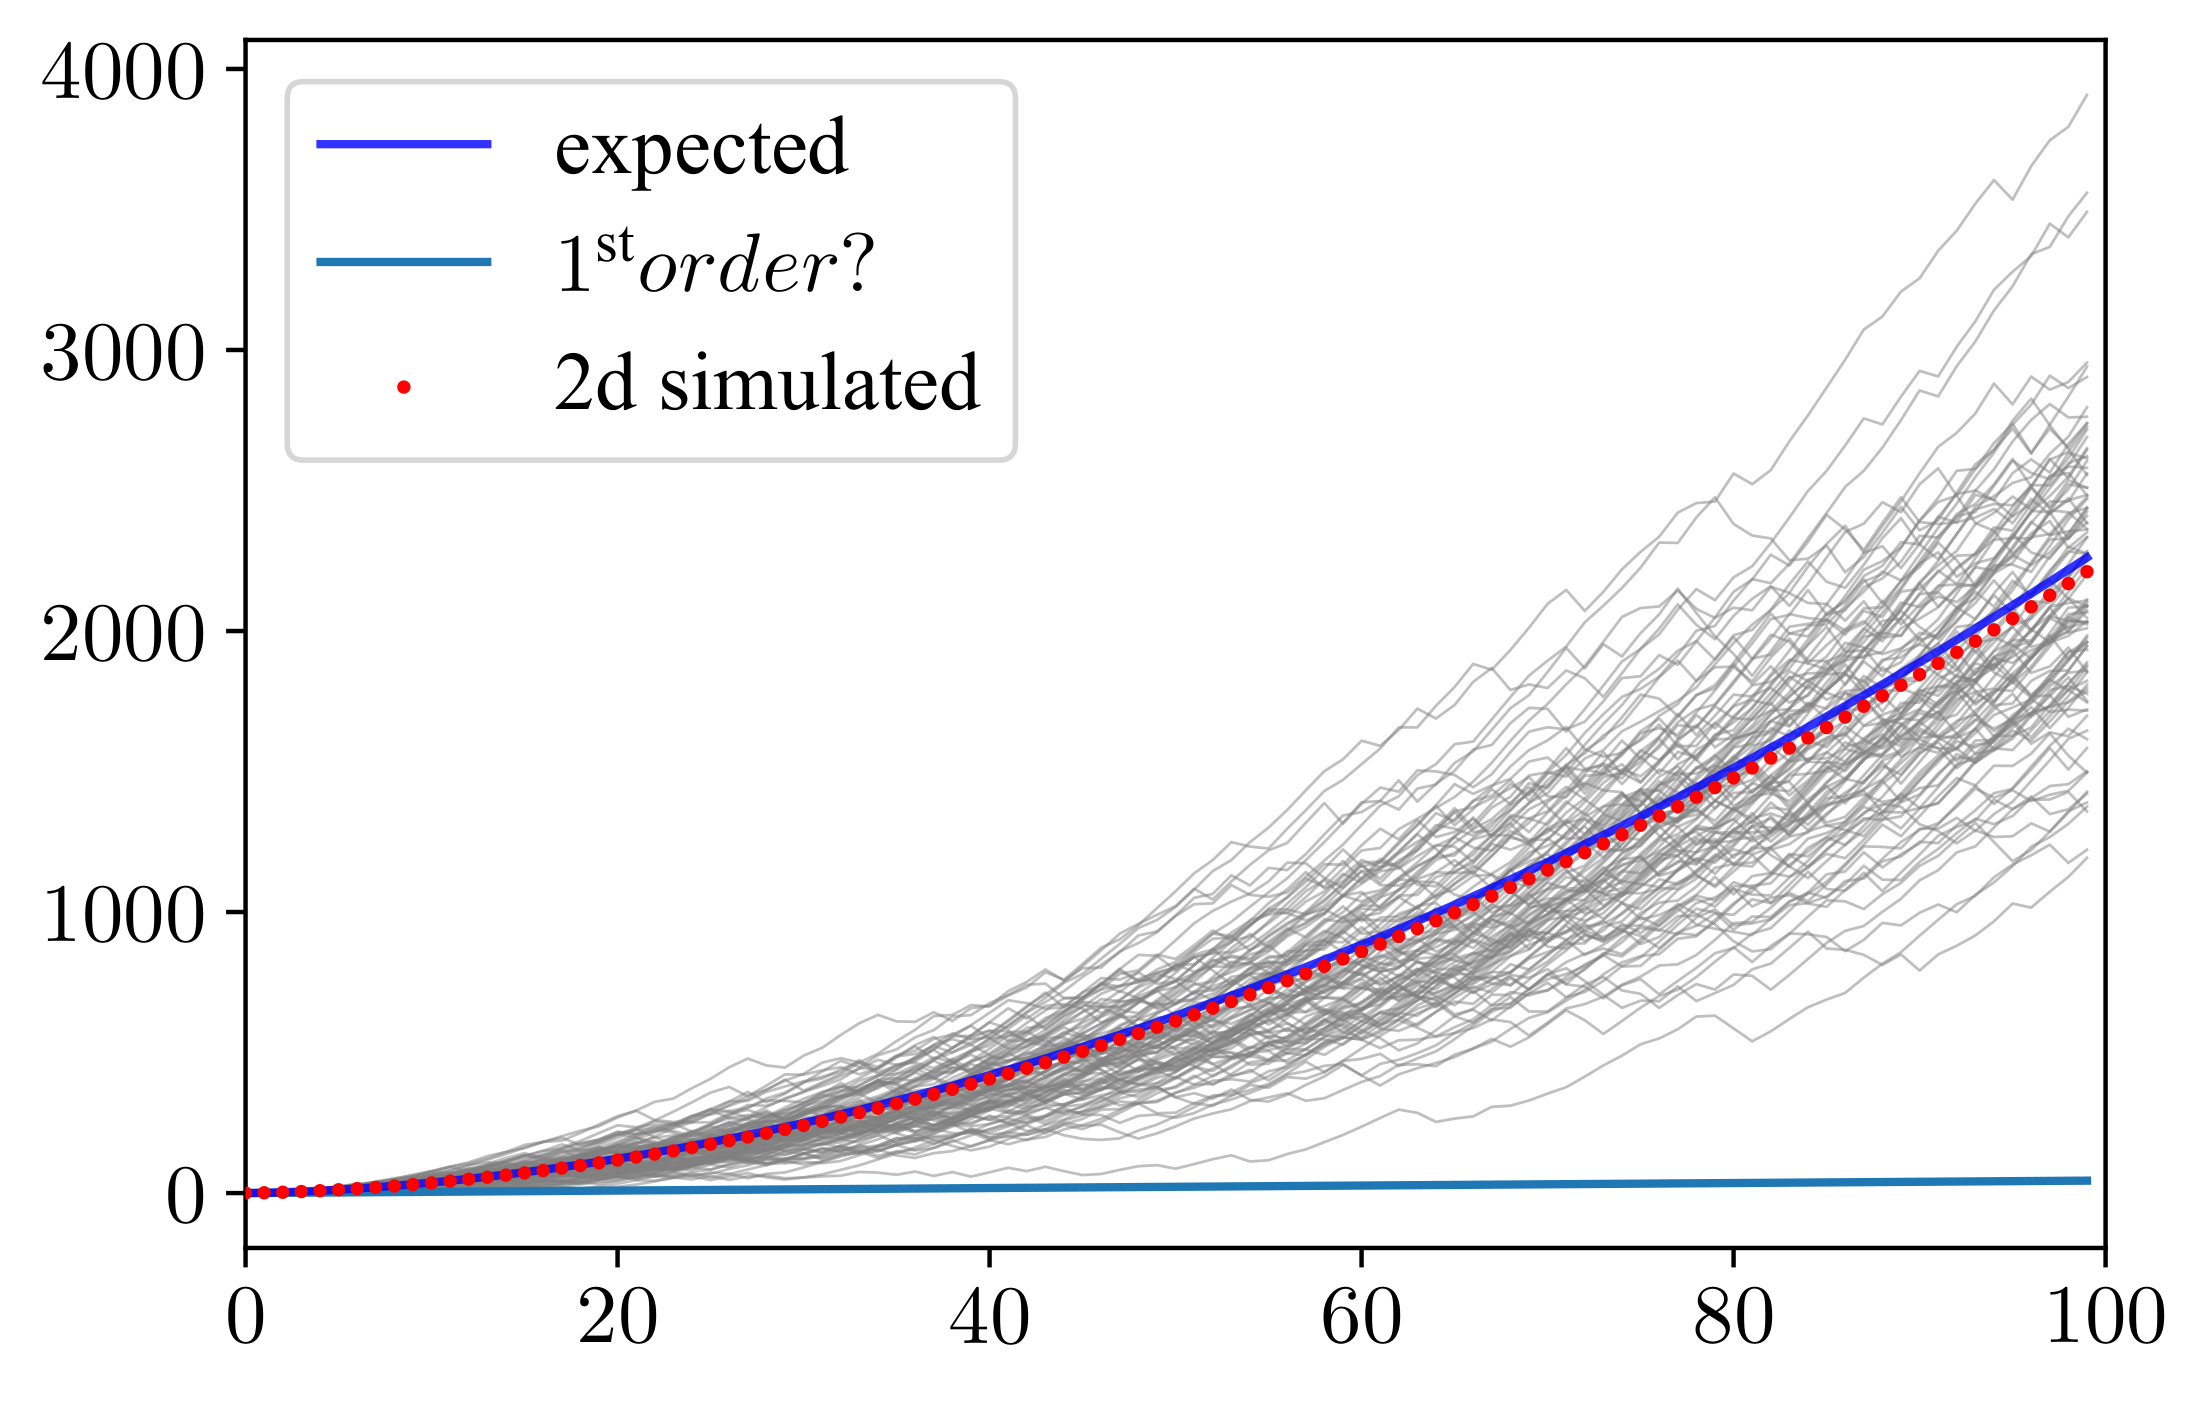

In [96]:
from scipy.special import iv
A = 2*np.pi *iv(0, 1)
expected = -iv(1, 1)/iv(0, 1)
l = 1
def R(N):
    R_N = 0
    result = []
    for i in range(N+1):
        result.append(R_N**2)
        R_N = (R_N **2 + l ** 2 - 2 * l * R_N * expected)**(1/2)
    return result[:-1]

def P(theta):
    return np.exp(-np.cos(theta))/A

c = P(np.pi)
def AceeptReject():
    global c
    global power
    while True:
        x = np.random.uniform(0, 2 *np.pi)
        y = np.random.uniform(0, 1)
        if y*c <= P(x):
            return x
l = 1
def evolve(r_n):
    theta = AceeptReject()
    return np.sqrt(r_n**2 + l **2 - 2 * l * r_n * np.cos(theta))

r_n = 0
N = 10000
M = 100
R_2 = np.zeros((N, M))
for i in range(N):
    r_n = 0
    for j in range(M):
        R_2[i, j] = r_n ** 2
        r_n = evolve(r_n)

L = l * np.arange(M)
plt.figure()
for i in range(100):
    plt.plot(L, R_2[i, :], lw=.5, alpha=.5, color='grey')
plt.scatter(L, R_2.mean(axis=0),label='2d simulated',s=2,color='red',zorder=10)
plt.plot(L, R(M), color='blue', label='expected',alpha=.8,zorder=5)
plt.plot(L, (L * (-expected))**2,label='$1^{\mathrm{st}} order?$')
plt.xlim(0, l *M)
plt.legend()
plt.gcf()

In [1]:
from scipy.special import iv
A = 2*np.pi *iv(0, 1)
expected = -iv(1, 1)/iv(0, 1)
l = 1
def R(N):
    R_N = 0
    result = []
    for i in range(N+1):
        result.append(R_N**2)
        R_N = (R_N **2 + l ** 2 - 2 * l * R_N * expected)**(1/2)
    return result[:-1]

def P(theta):
    return np.exp(-np.cos(theta))/A

c = P(np.pi)
def AceeptReject():
    global c
    global power
    while True:
        x = np.random.uniform(0, 2 *np.pi)
        y = np.random.uniform(0, 1)
        if y*c <= P(x):
            return x
        
def evolve(r_n):
    theta = AceeptReject()
    return np.sqrt(r_n**2 + l **2 - 2 * l * r_n * np.cos(theta))

r_n = 0
N = 1000
M = 100
R_2 = np.zeros((N, M))
for i in range(N):
    r_n = 0
    for j in range(M):
        R_2[i, j] = r_n ** 2
        r_n = evolve(r_n)

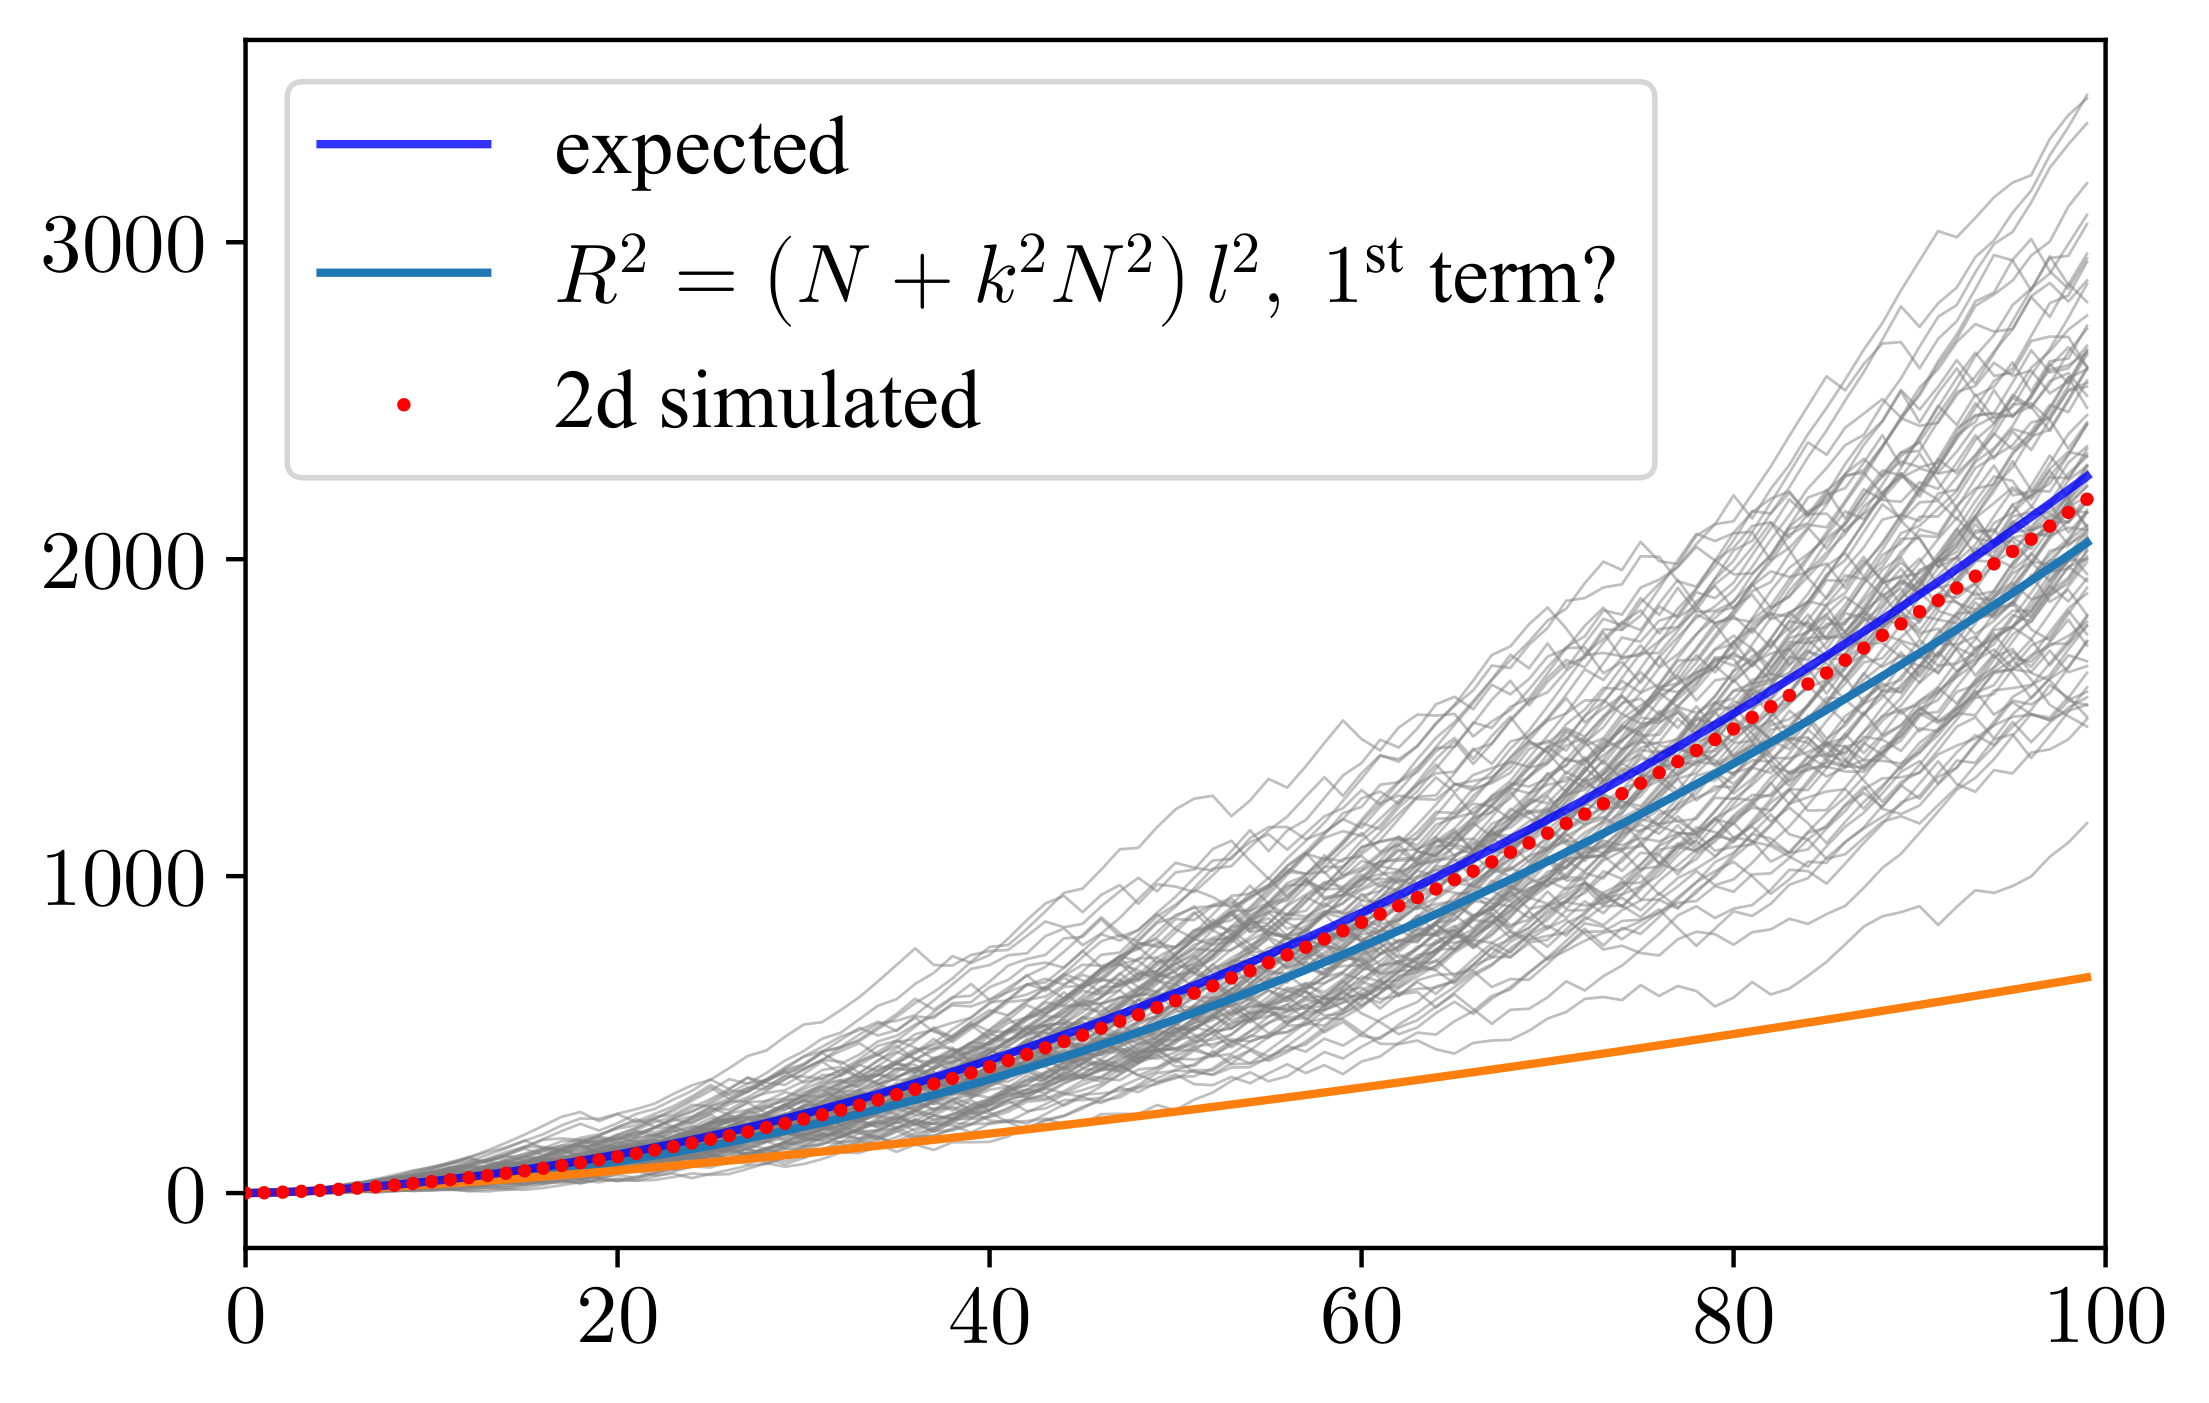

In [119]:
L = np.arange(M)
plt.figure()
for i in range(100):
    plt.plot(L, R_2[i, :], lw=.5, alpha=.5, color='grey')
plt.scatter(L, R_2.mean(axis=0),label='2d simulated',s=2,color='red',zorder=10)
plt.plot(L, R(M), color='blue', label='expected',alpha=.8,zorder=5)
plt.plot(L, L * l**2 + (L * (-expected) * l)**2,label='$R^2=\left(N+k^2N^2\\right)l^2,\;1^{\mathrm{st}}\;\\text{term?}$')
plt.plot(L, [sum(1+ 2*(-expected)*np.sqrt(np.arange(n))) for n in range(M)])
plt.xlim(0, l *M)
plt.legend()
plt.gcf()

In [87]:
np.linalg.lstsq(l*np.arange(M), R(M), 4)

array([ 1.00515263e-06, -2.71630631e-04,  2.31339158e-01,  1.64544788e+00,
       -1.50183763e+00])

In [90]:
np.linalg.lstsq?

In [105]:
np.random.choice?

In [113]:
(-expected*2)**2

0.797056006612437

In [112]:
2 * (1-expected)

2.892779931793069

In [116]:
L * l**2 + (L * (-expected) * l)**2

array([0.00000000e+00, 1.19926400e+00, 2.79705601e+00, 4.79337601e+00,
       7.18822403e+00, 9.98160004e+00, 1.31735041e+01, 1.67639361e+01,
       2.07528961e+01, 2.51403841e+01, 2.99264002e+01, 3.51109442e+01,
       4.06940162e+01, 4.66756163e+01, 5.30557443e+01, 5.98344004e+01,
       6.70115844e+01, 7.45872965e+01, 8.25615365e+01, 9.09343046e+01,
       9.97056007e+01, 1.08875425e+02, 1.18443777e+02, 1.28410657e+02,
       1.38776065e+02, 1.49540001e+02, 1.60702465e+02, 1.72263457e+02,
       1.84222977e+02, 1.96581025e+02, 2.09337601e+02, 2.22492706e+02,
       2.36046338e+02, 2.49998498e+02, 2.64349186e+02, 2.79098402e+02,
       2.94246146e+02, 3.09792418e+02, 3.25737218e+02, 3.42080547e+02,
       3.58822403e+02, 3.75962787e+02, 3.93501699e+02, 4.11439139e+02,
       4.29775107e+02, 4.48509603e+02, 4.67642627e+02, 4.87174180e+02,
       5.07104260e+02, 5.27432868e+02, 5.48160004e+02, 5.69285668e+02,
       5.90809860e+02, 6.12732581e+02, 6.35053829e+02, 6.57773605e+02,
      

In [3]:
sample =[]
for n in range(10000):
    sample.append(AceeptReject())

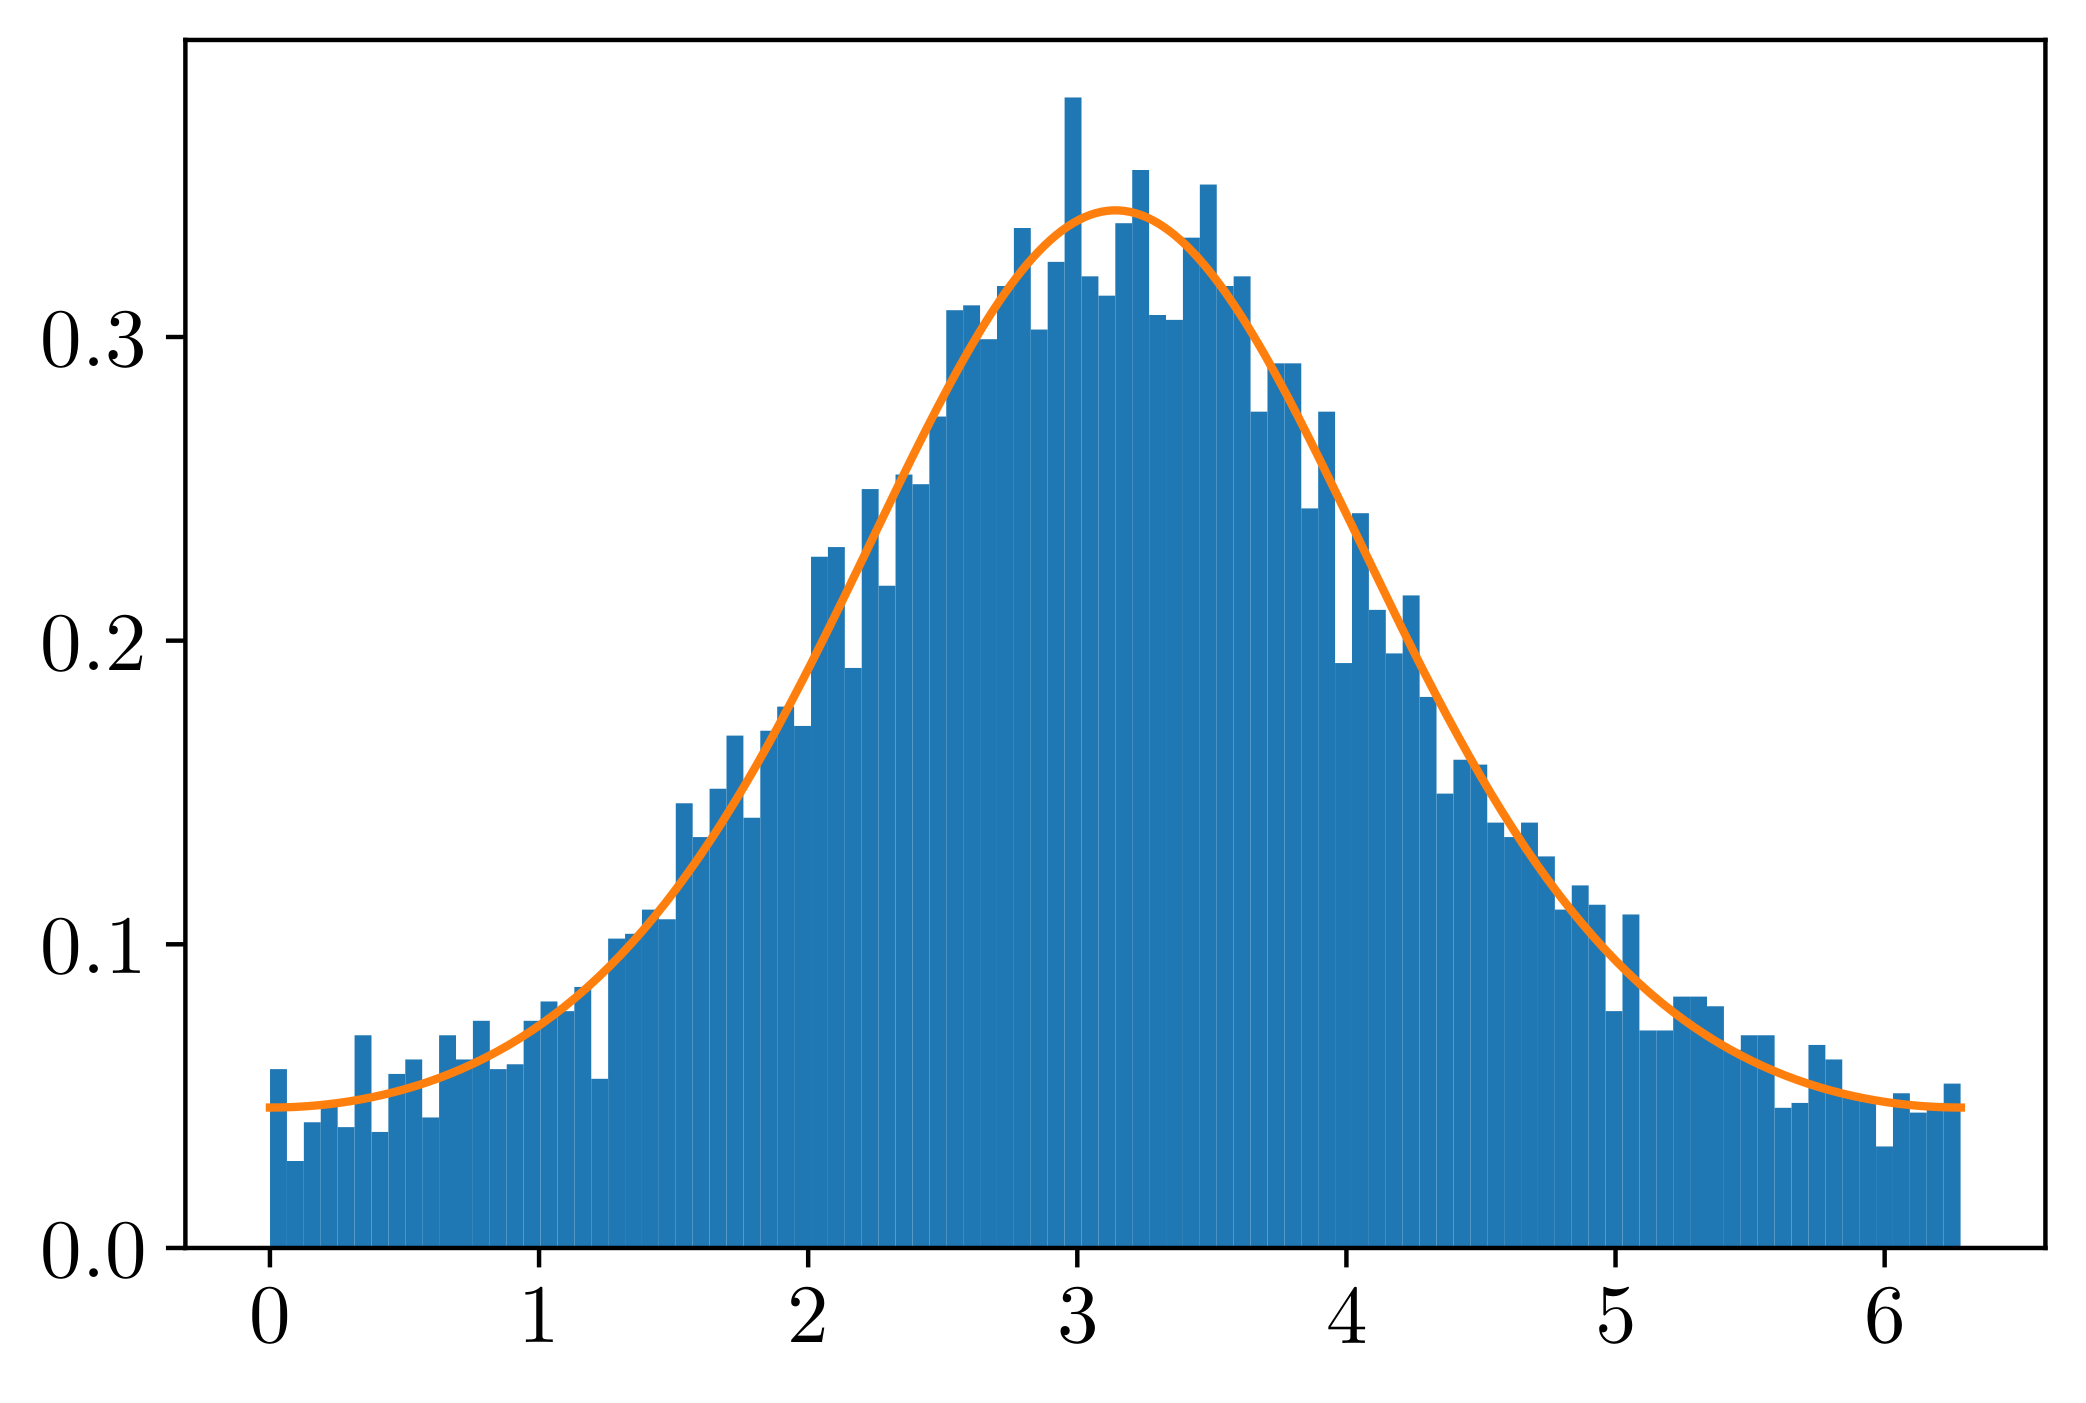

In [10]:
plt.figure()
plt.hist(sample, 100,density=True)
x = np.linspace(0, 2*np.pi, 300)
plt.plot(x, P(x))
plt.gcf()

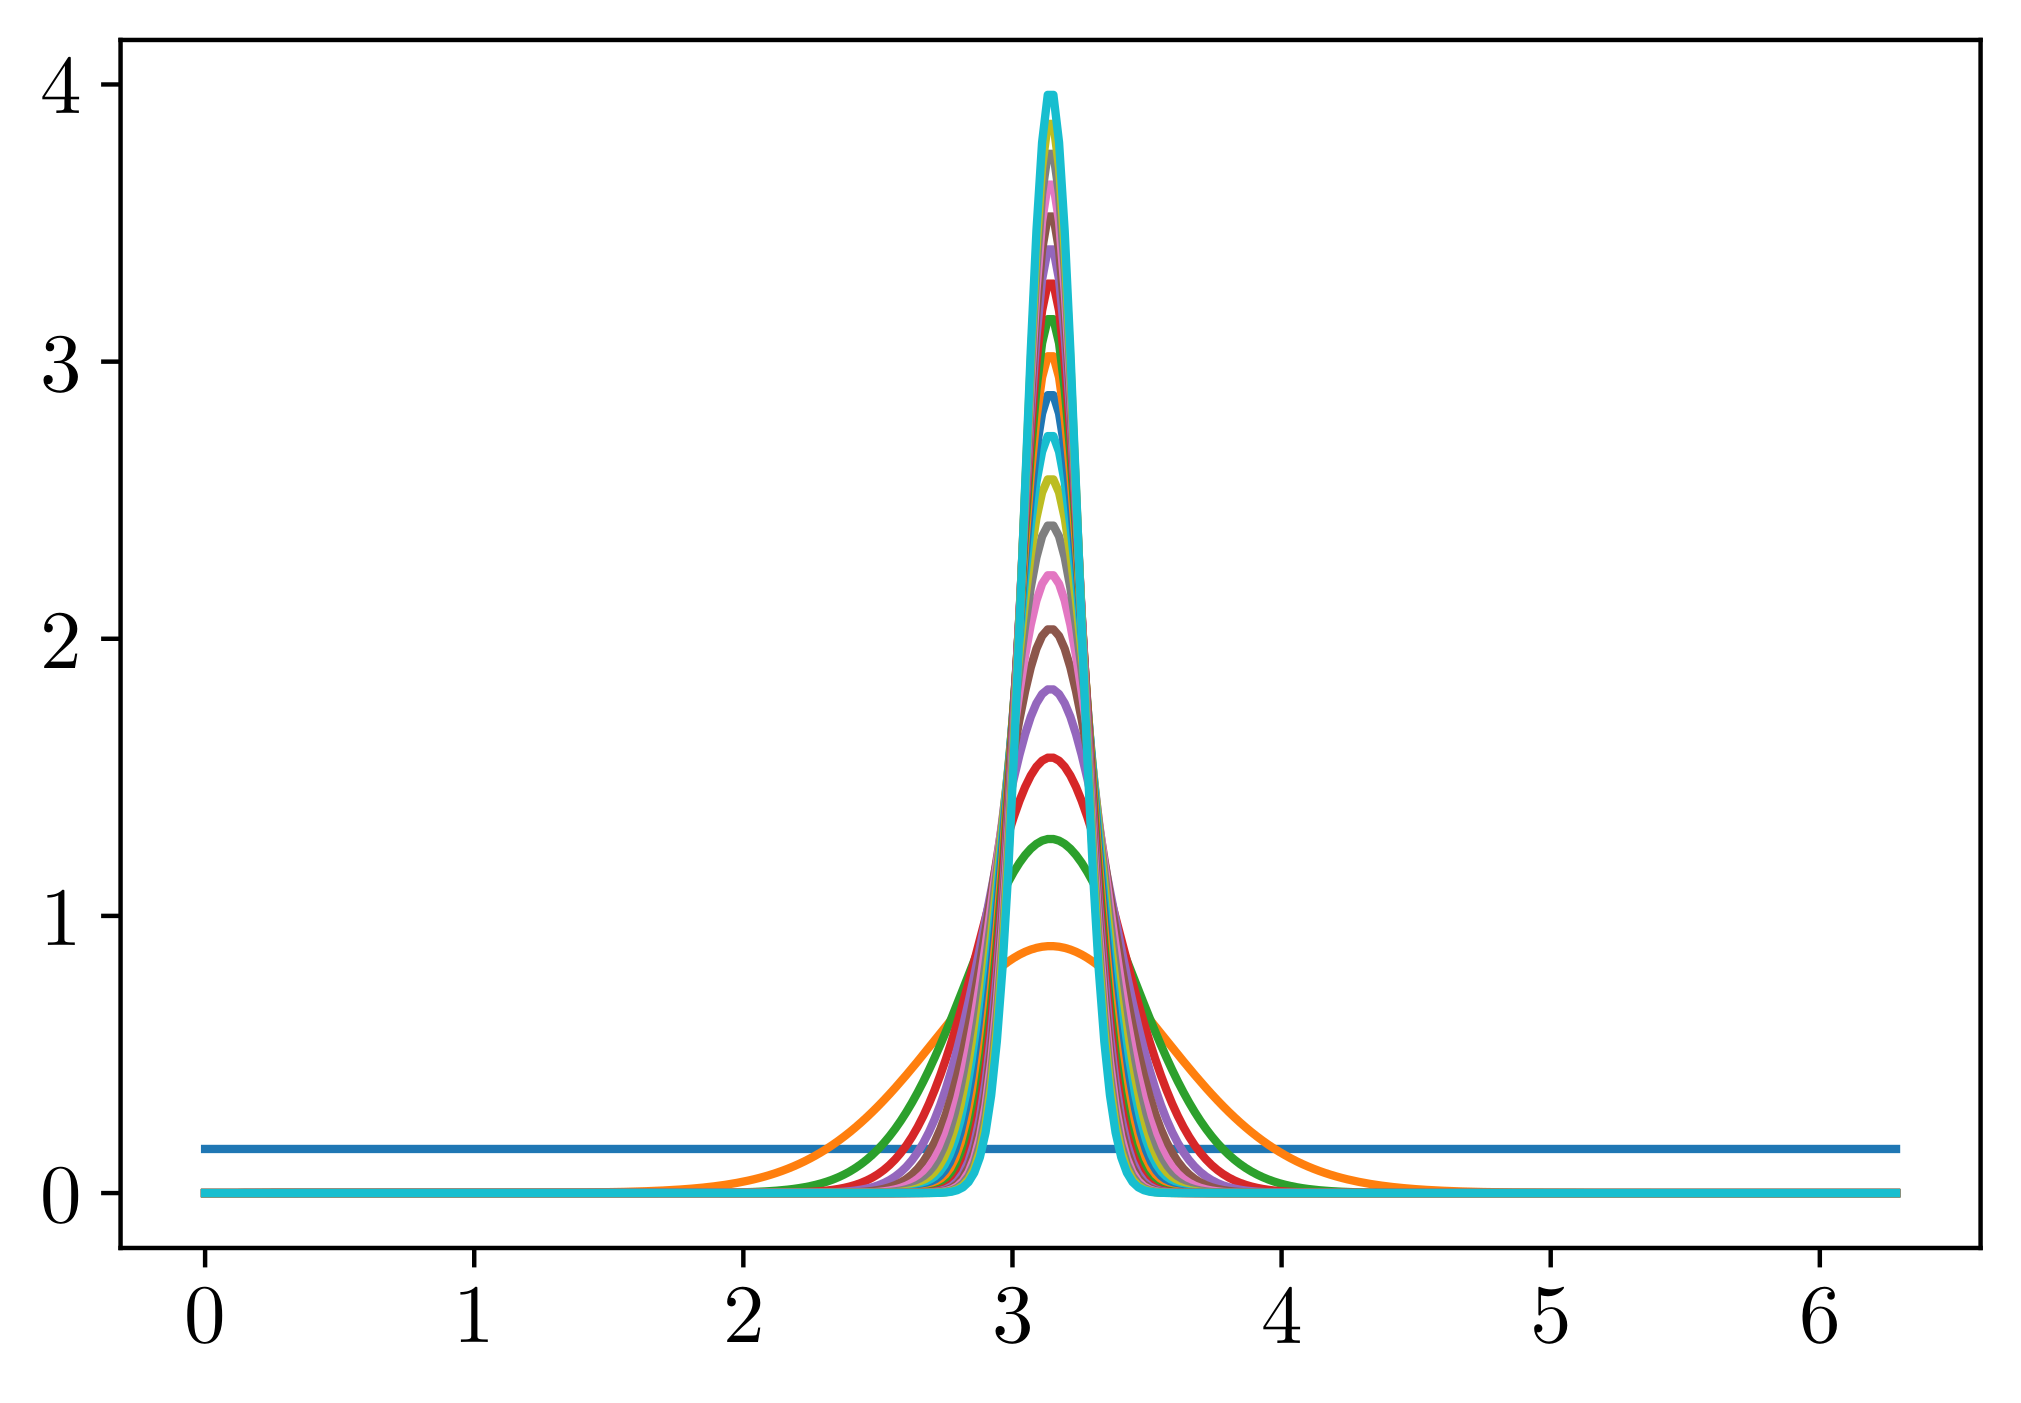

In [12]:
ks = np.linspace(0, 100, 20)
plt.figure()
def P(theta, k):
    A = 2* np.pi *iv(0, k)
    return np.exp(-k * np.cos(theta))/A
for k in ks:
    x = np.linspace(0, 2*np.pi, 300)
    plt.plot(x, P(x, k))
plt.gcf()